In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install adfuller

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement adfuller (from versions: none)
ERROR: No matching distribution found for adfuller


In [2]:
df = pd.read_csv("/content/VIC Historical Data (5).csv")
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1747,11/24/2022,61.0,60.0,62.1,60.0,1.14M,2.18%
1748,11/25/2022,65.0,63.0,65.0,62.6,2.29M,6.56%
1749,11/28/2022,65.0,66.5,67.1,65.0,3.25M,0.00%
1750,11/29/2022,69.4,65.0,69.4,64.2,3.56M,6.77%
1751,11/30/2022,69.6,69.5,70.2,68.0,3.23M,0.29%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1752 non-null   object 
 1   Price     1752 non-null   float64
 2   Open      1752 non-null   float64
 3   High      1752 non-null   float64
 4   Low       1752 non-null   float64
 5   Vol.      1752 non-null   object 
 6   Change %  1752 non-null   object 
dtypes: float64(4), object(3)
memory usage: 95.9+ KB


In [4]:
df.describe()

,Price,Open,High,Low
count,1752.000000,1752.000000,1752.000000,1752.000000
mean,76.568489,76.478716,77.395226,75.528217
std,28.935213,28.929694,29.219089,28.603848
min,29.417000,30.022000,30.520000,28.065000
25%,40.330000,40.144000,40.723250,39.345000
50%,83.672000,83.556000,84.889000,82.398500
75%,101.987250,101.653000,102.302750,100.445000
max,128.000000,128.000000,129.689000,127.111000


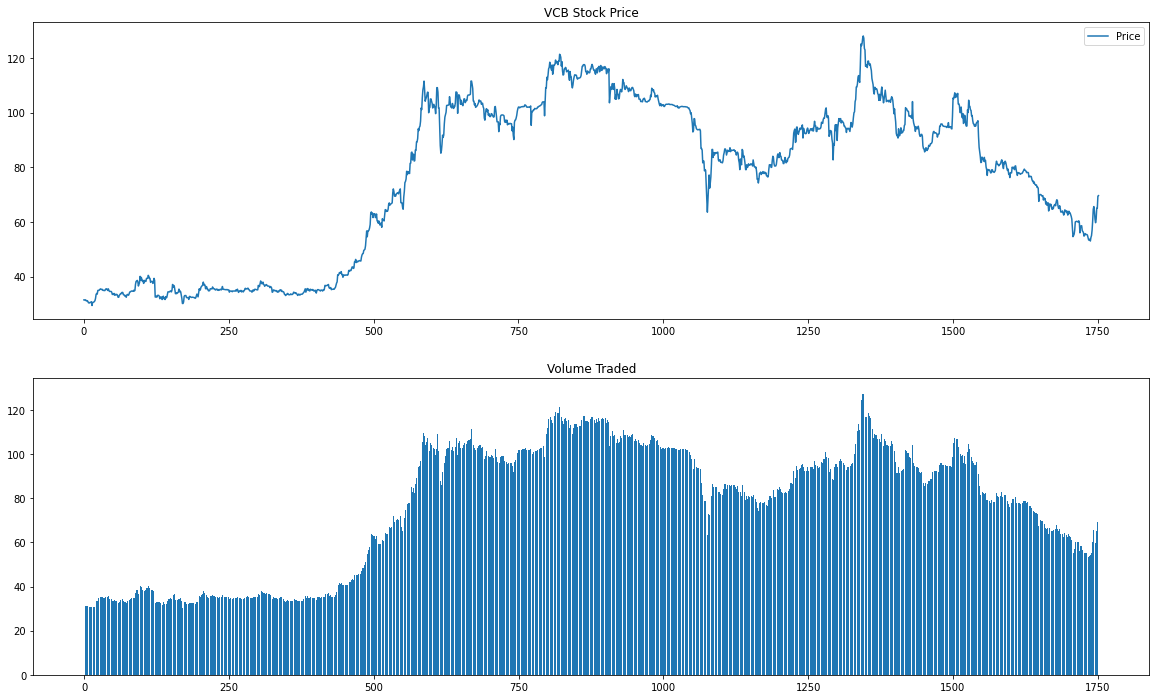

In [5]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.title('VCB Stock Price')
plt.plot(df.Price, label='Price')
plt.legend()
plt.subplot(2,1,2)
plt.title('Volume Traded')
plt.bar(x=df.index, height=df['Price'])
plt.show()

In [6]:
data = list(df['Price'])

In [7]:
#train test split
to_row=int(len(df)*0.8)
training_data=df[0:to_row]['Price']
testing_data=df[0:to_row]['Price']

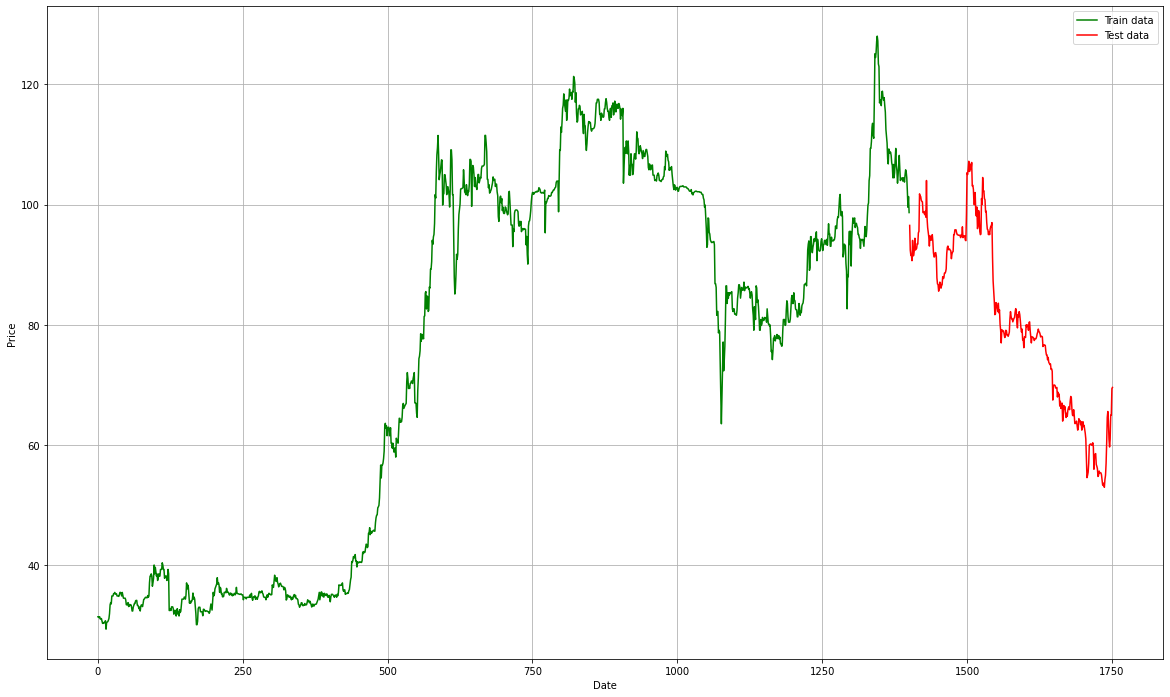

In [8]:
#split data into train and training set
plt.figure(figsize=(20,12))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df[0:to_row]['Price'],'green',label='Train data')
plt.plot(df[to_row:]['Price'],'red',label='Test data')
plt.legend()

In [9]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print("1. ADF: ", result[0])
print("2. p-value: ", result[1])
print("3. Num of Lags: ", result[2])
print("4. Num of Observations Used for ADF Regression: ", result[3])
print("5. Critical Values: ")
for key, val in result[4].items():
    print("\t", key, ": ", val)

1. ADF:  -1.6354611715679732
2. p-value:  0.4646334332919345
3. Num of Lags:  0
4. Num of Observations Used for ADF Regression:  1751
5. Critical Values: 
	 1% :  -3.434090098474972
	 5% :  -2.8631920451777195
	 10% :  -2.5676494998436072


In [ ]:
!pip install pmdarima

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [11]:
to_row
x_train = df[:to_row]
x_test = df[to_row:]
print(len(x_train), len(x_test))

1401 351


In [12]:
stepwise_fit = auto_arima(data, trace = True, suppress_warnings = True)
print(stepwise_fit.summary)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6415.751, Time=4.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6417.386, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6418.038, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6418.084, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6415.749, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6419.915, Time=0.74 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.735 seconds
<function ARIMA.summary at 0x7fc47a665790>


In [13]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,1,3))
model_2 = sm.tsa.arima.ARIMA(x_train['Price'], order=(2,1,3))

In [14]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1752
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -3202.564
Date:                Wed, 04 Jan 2023   AIC                           6417.128
Time:                        19:47:18   BIC                           6449.936
Sample:                             0   HQIC                          6429.256
                               - 1752                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5193      0.098      5.312      0.000       0.328       0.711
ar.L2         -0.8415      0.095     -8.823      0.000      -1.029      -0.655
ma.L1         -0.4922      0.100     -4.930      0.000      -0.688      -0.297
ma.L2          0.8363      0.092      9.045      0.000       0.655       1.018
ma.L3         -0.0121      0.017     -0.705      0.481      -0.046       0.021
sigma2         2.2707      0.035     64.813      0.000       2.202       2.339
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4505.85
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.12   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
result2 = model_2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1401
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2556.322
Date:                Wed, 04 Jan 2023   AIC                           5124.644
Time:                        19:47:22   BIC                           5156.109
Sample:                             0   HQIC                          5136.407
                               - 1401                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5368      0.110      4.884      0.000       0.321       0.752
ar.L2         -0.8341      0.101     -8.299      0.000      -1.031      -0.637
ma.L1         -0.5118      0.112     -4.565      0.000      -0.732      -0.292
ma.L2          0.8132      0.101      8.085      0.000       0.616       1.010
ma.L3         -0.0153      0.019     -0.817      0.414      -0.052       0.021
sigma2         2.2569      0.037     60.446      0.000       2.184       2.330
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4632.32
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               7.06   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
start = len(x_train)
end = len(x_train)+len(x_test)-1
pred = result.predict(start = start, end = end)
pred2 = result2.predict(start = start, end = end)
pred2 

1401    98.692509
1402    98.628655
1403    98.615993
1404    98.662459
1405    98.697963
          ...    
1747    98.659950
1748    98.659950
1749    98.659950
1750    98.659950
1751    98.659950
Name: predicted_mean, Length: 351, dtype: float64

In [17]:
s = pd.Series(pred, index = df.index[to_row:])
s

1401    98.723670
1402    96.428757
1403    92.278437
1404    91.585295
1405    91.761546
          ...    
1747    59.798819
1748    61.212743
1749    65.138336
1750    64.854832
1751    69.286720
Length: 351, dtype: float64

In [18]:
pred

array([ 98.72367012,  96.42875705,  92.27843672,  91.58529531,
        91.76154621,  90.72822399,  93.99894142,  91.31921401,
        91.49682848,  92.59265328,  94.56829772,  92.32776474,
        92.41728246,  92.73455204,  93.71152411,  93.49086711,
        95.1970056 ,  95.45413818, 101.95074404, 101.45436612,
       101.17435141, 100.52196585, 100.57251654, 100.62564088,
        98.67541222,  98.62145567,  98.52305652,  98.38918682,
        99.00234685,  97.85730523, 104.05813686,  97.57469016,
        96.00775168,  95.47291201,  94.79568002,  93.10608076,
        94.70385494,  94.0401601 ,  94.13418803,  94.17415168,
        95.03162761,  93.81939272,  91.87804555,  91.31192238,
        91.43344261,  92.08168715,  91.92509623,  91.27168955,
        87.7058207 ,  86.85888908,  86.85209321,  85.607166  ,
        85.99755549,  87.08323595,  87.06355838,  86.10808791,
        86.46738364,  86.69214545,  88.05295731,  87.71490463,
        87.7515603 ,  88.58915751,  88.62998015,  88.81

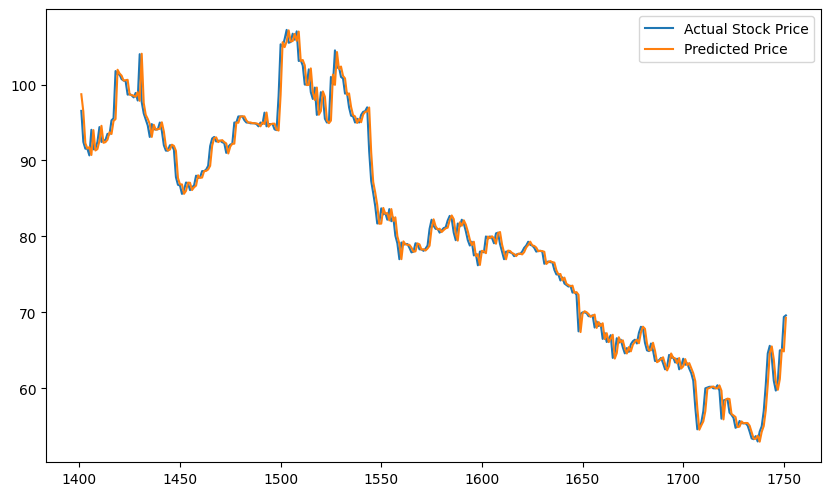

In [19]:
plt.figure(figsize=(10,6), dpi=100)
df['Price'][to_row:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

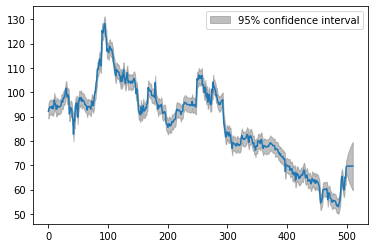

In [20]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result, start=len(df)-500, end=len(df)+10, dynamic = False);

In [21]:
#preducting future 30 days
pred_future = result.predict(start = end, end = end+30)
pred_future

array([69.28672018, 69.6498229 , 69.71460743, 69.70254748, 69.64176492,
       69.62034752, 69.66037629, 69.6991884 , 69.68565865, 69.64596986,
       69.63674408, 69.66535292, 69.68797441, 69.67564676, 69.65020748,
       69.64737033, 69.66730532, 69.68004585, 69.66988614, 69.65388808,
       69.65412963, 69.66771825, 69.674572  , 69.66669589, 69.65683778,
       69.65834627, 69.66742577, 69.67087159, 69.66502028, 69.65908165,
       69.6609217 ])

In [22]:
import datetime
start_date = datetime.datetime(2022,12,1)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [23]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-01    69.286720
2022-12-02    69.649823
2022-12-03    69.714607
2022-12-04    69.702547
2022-12-05    69.641765
2022-12-06    69.620348
2022-12-07    69.660376
2022-12-08    69.699188
2022-12-09    69.685659
2022-12-10    69.645970
2022-12-11    69.636744
2022-12-12    69.665353
2022-12-13    69.687974
2022-12-14    69.675647
2022-12-15    69.650207
2022-12-16    69.647370
2022-12-17    69.667305
2022-12-18    69.680046
2022-12-19    69.669886
2022-12-20    69.653888
2022-12-21    69.654130
2022-12-22    69.667718
2022-12-23    69.674572
2022-12-24    69.666696
2022-12-25    69.656838
2022-12-26    69.658346
2022-12-27    69.667426
2022-12-28    69.670872
2022-12-29    69.665020
2022-12-30    69.659082
2022-12-31    69.660922
dtype: float64

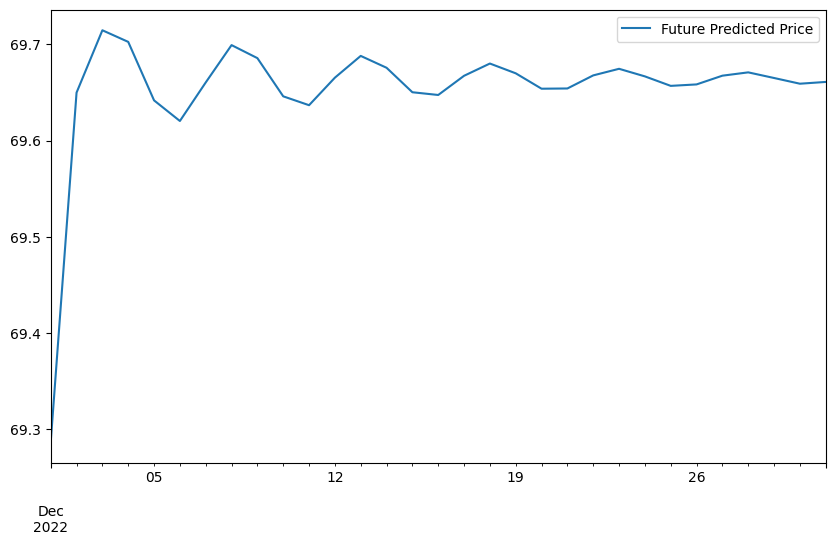

In [24]:
plt.figure(figsize=(10,6), dpi=100)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [26]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [27]:
#Using MAE to measure the accuracy of a model
mape = mean_absolute_percentage_error(x_test.Price, pred2)
mse = mean_squared_error(x_test.Price, pred2)
rmse = np.sqrt(mse)
print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.0f}")
print(f"MSE: {mse:.2f}")

MAPE: 26.98%
RMSE: 23
MSE: 525.14


In [28]:
x_test.Price

1401    96.533
1402    92.444
1403    91.556
1404    91.556
1405    90.667
         ...  
1747    61.000
1748    65.000
1749    65.000
1750    69.400
1751    69.600
Name: Price, Length: 351, dtype: float64